In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('earthquake_with_asc_postion.csv')
df

,Date,Year,month,day,hour,minute,second,Tsu,Vol,Location Name,...,Total Houses Damaged,Total Houses Damaged Description,Sun,Moon,Mercury,Venus,Mars,Jupiter,Saturn,Asc
0,1900-01-11 09:07:00.000,1900.0,1.0,11.0,9.0,7.0,0.0,NaN,NaN,JAPAN: SEA OF JAPAN,...,NaN,NaN,269.399841,38.393134,251.959314,297.924214,270.561022,221.764485,247.570935,102.123151
1,1900-01-20 06:33:30.000,1900.0,1.0,20.0,6.0,33.0,30.0,5896.0,NaN,MEXICO,...,NaN,NaN,278.452771,147.504249,265.283557,308.916341,277.483457,223.326545,248.549924,179.690723
2,1900-05-16 20:12:00.000,1900.0,5.0,16.0,20.0,12.0,0.0,5897.0,NaN,MEXICO: NEAR COAST OF JALISCO,...,NaN,NaN,34.135073,240.329408,19.108730,78.249723,8.265180,226.046934,252.878891,141.846393
3,1900-10-29 09:11:00.000,1900.0,10.0,29.0,9.0,11.0,0.0,1276.0,NaN,VENEZUELA: MACUTO,...,NaN,3.0,194.163400,260.081561,217.759138,152.211219,116.832421,230.540954,249.579584,177.668772
4,1900-12-25 05:09:00.000,1900.0,12.0,25.0,5.0,9.0,0.0,NaN,NaN,RUSSIA: KURIL ISLANDS,...,NaN,NaN,251.645535,291.533188,236.147770,220.992332,139.102217,243.078287,255.554500,48.918236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,2024-12-05 18:44:21,2024.0,12.0,5.0,18.0,44.0,21.0,5940.0,NaN,CALIFORNIA: OFFSHORE CAPE MENDOCINO,...,NaN,NaN,231.056258,284.895064,231.814219,275.213505,103.087868,53.468111,319.977111,277.745218
2202,2024-12-17 01:47:26,2024.0,12.0,17.0,1.0,47.0,26.0,5942.0,NaN,"VANUATU ISLANDS: EFATE, PORT VILA",...,570.0,3.0,242.532428,84.591314,223.438016,288.153260,102.400598,51.942323,320.479984,347.418640
2203,2025-01-07 01:05:16,2025.0,1.0,7.0,1.0,5.0,16.0,NaN,NaN,CHINA: TIBET (XIZANG PROVINCE),...,23588.0,4.0,263.898407,354.511388,244.955049,311.027728,96.698976,49.539867,321.927730,262.975988
2204,2025-01-13 12:19:32,2025.0,1.0,13.0,12.0,19.0,32.0,5948.0,NaN,JAPAN: MIYAZAKI,...,NaN,NaN,270.487264,85.196002,254.288715,317.617141,94.171573,49.009504,322.491624,139.394393


### Now for fair comparison we pick dates of 10000 days from 2000 with random location

In [3]:
odf = pd.read_csv("dates_from_2000_random_location.csv") #o for other 

## First lets see if there is any pattern just visually analyzing the relative longitude of planets/sun

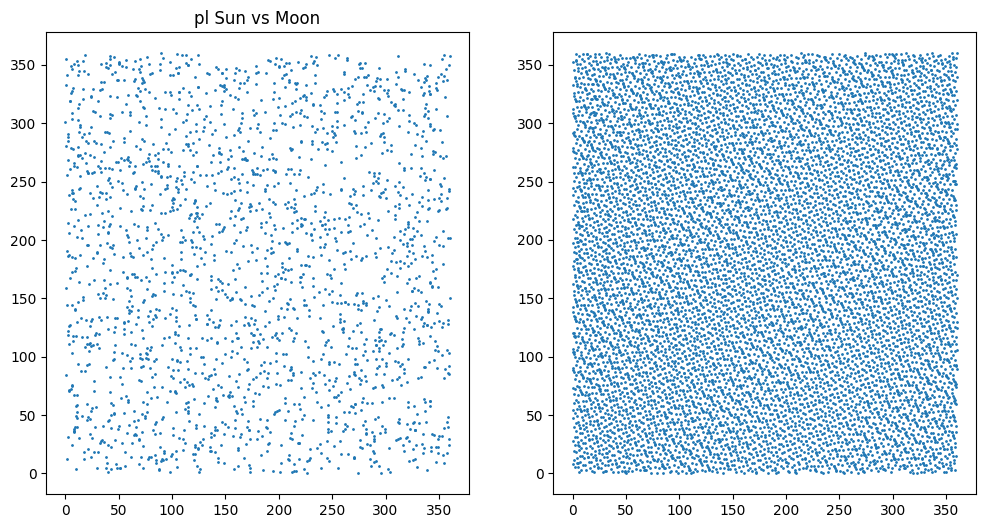

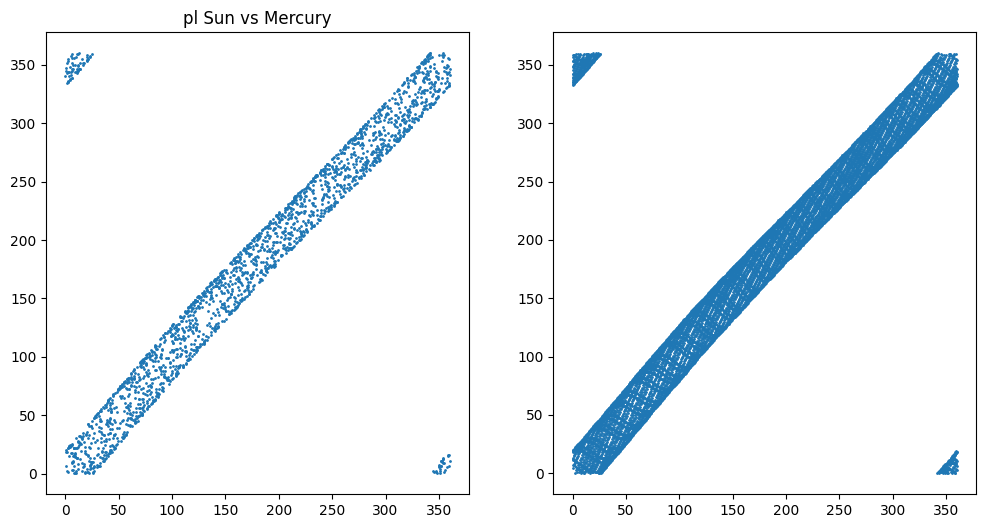

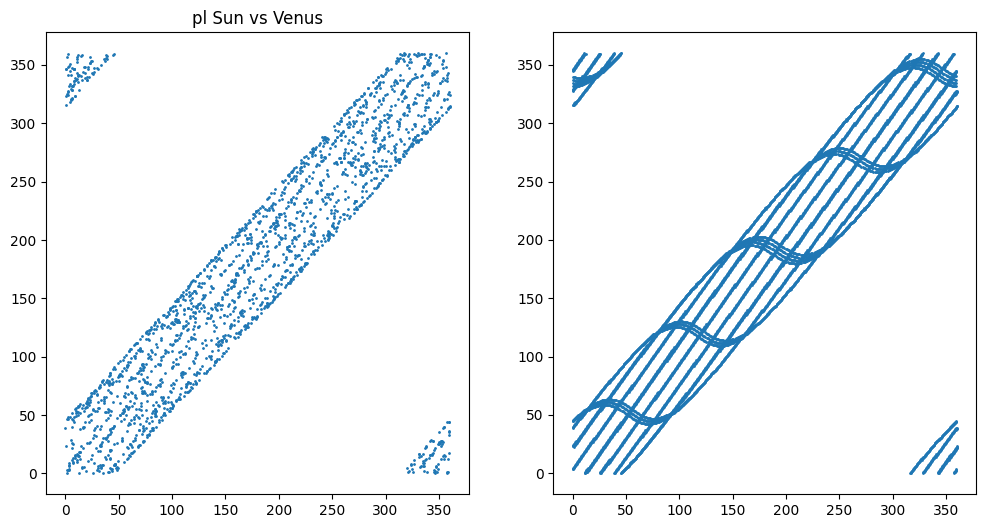

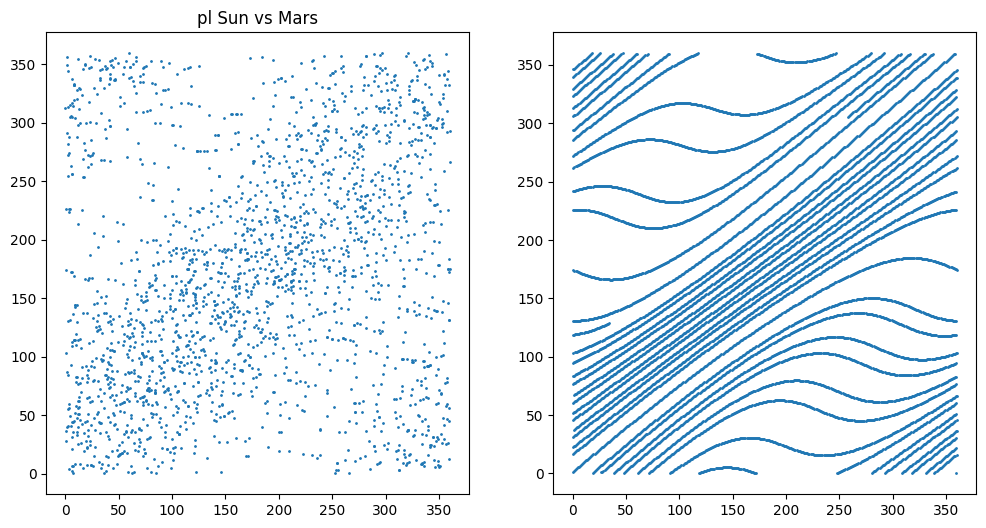

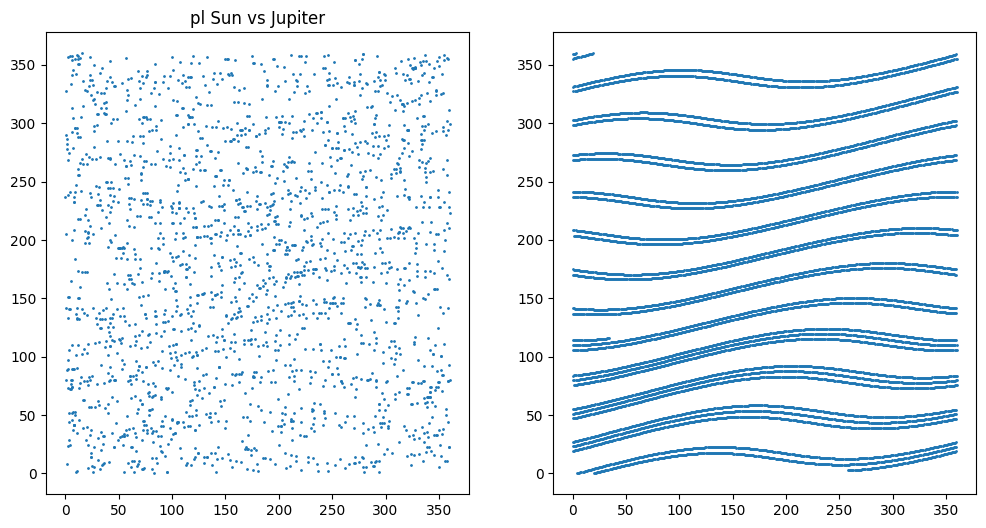

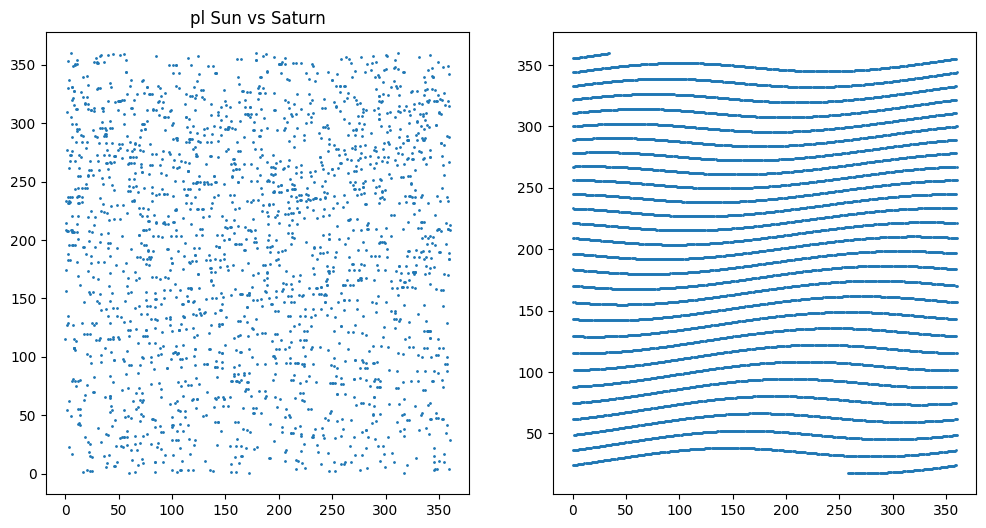

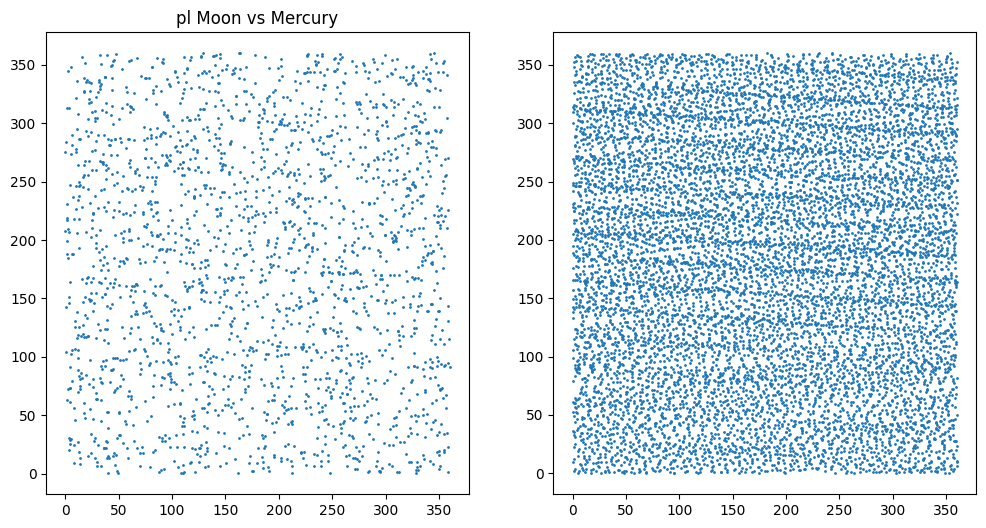

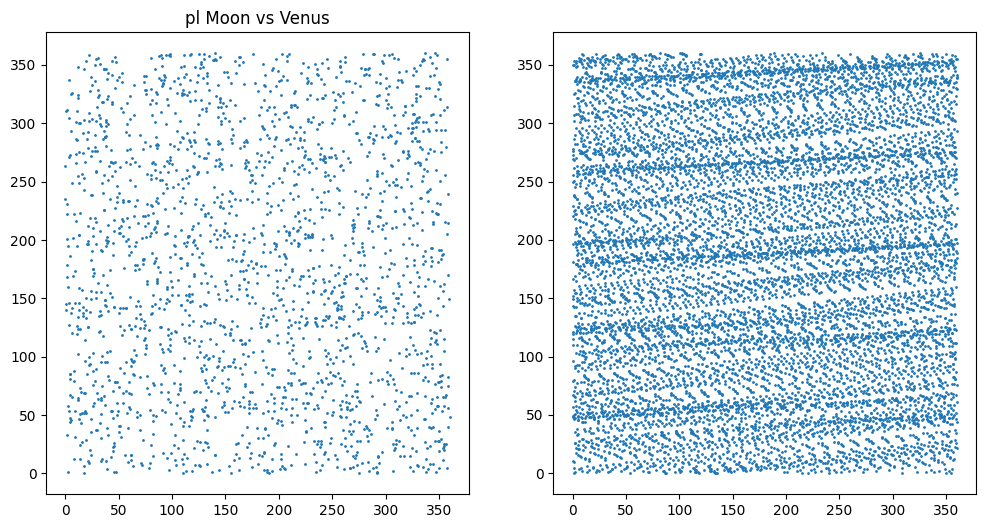

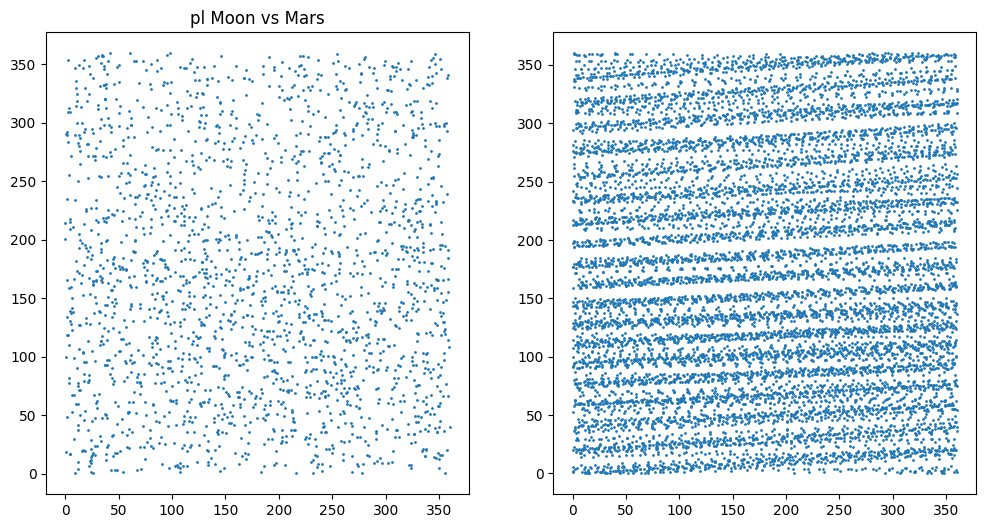

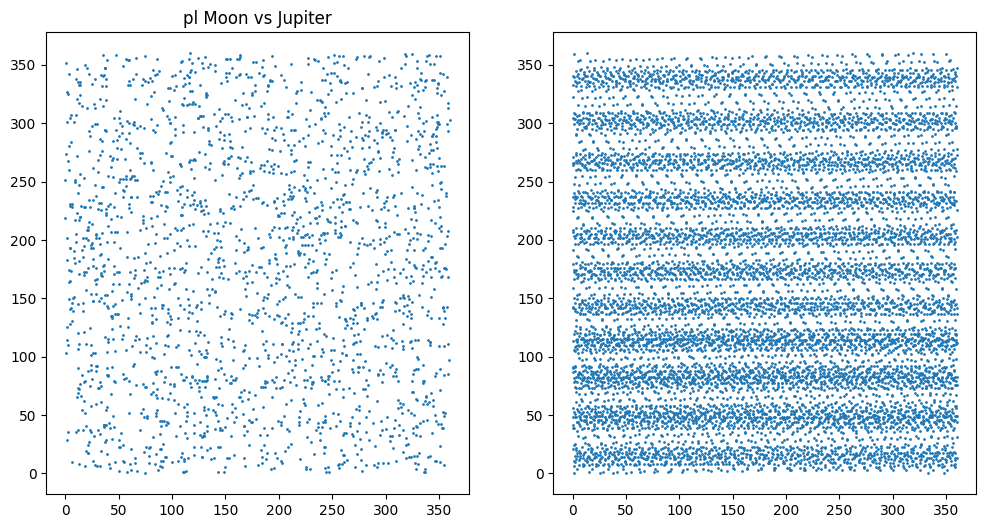

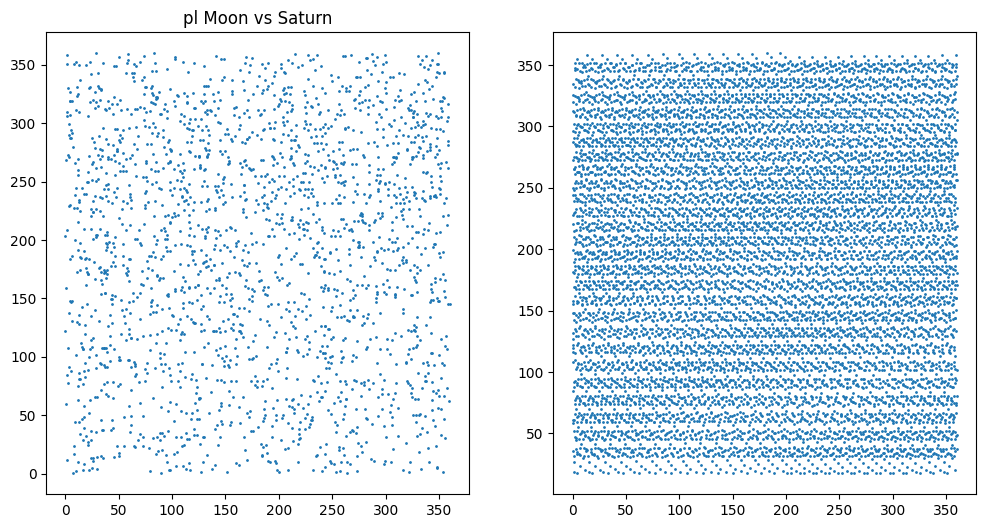

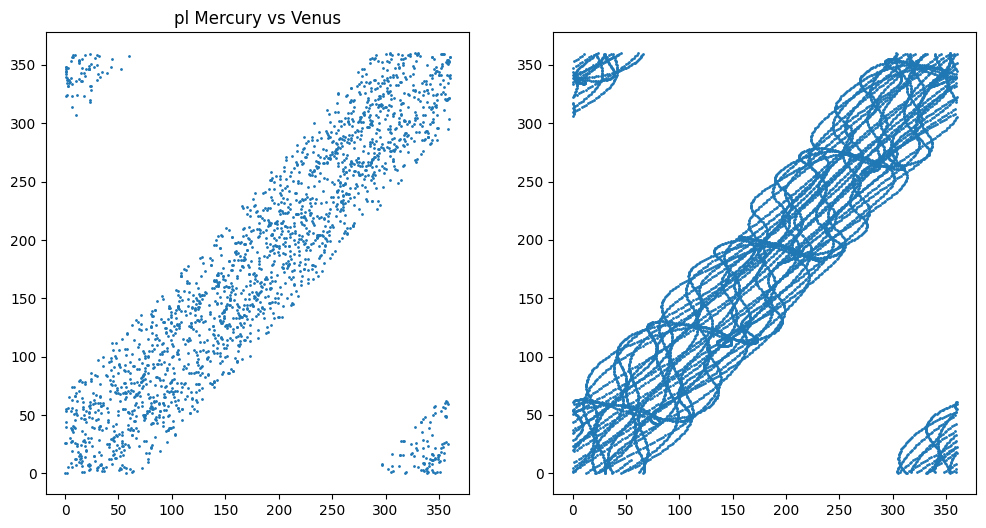

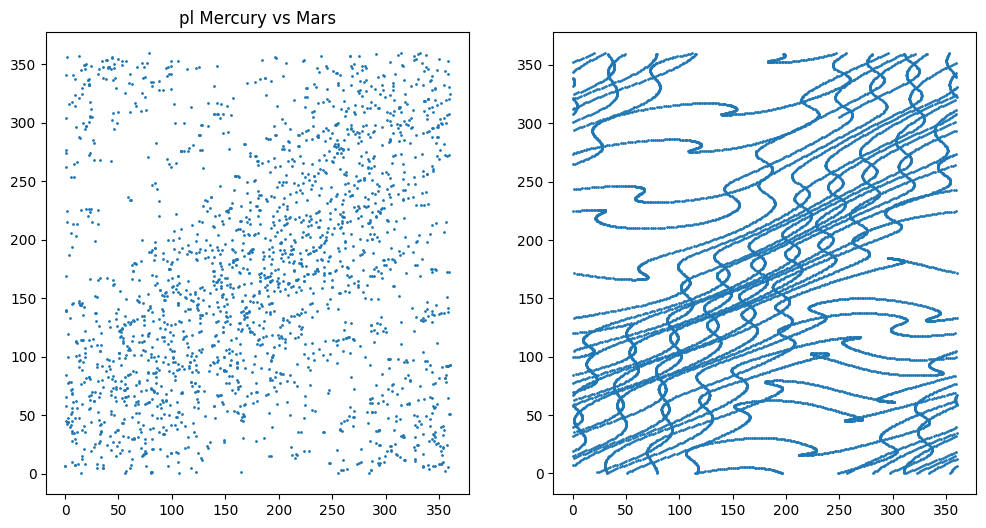

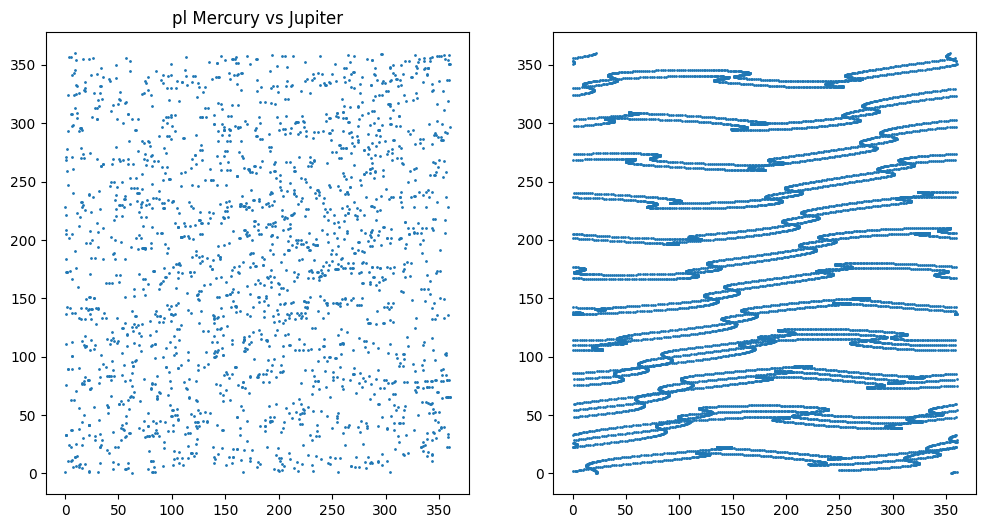

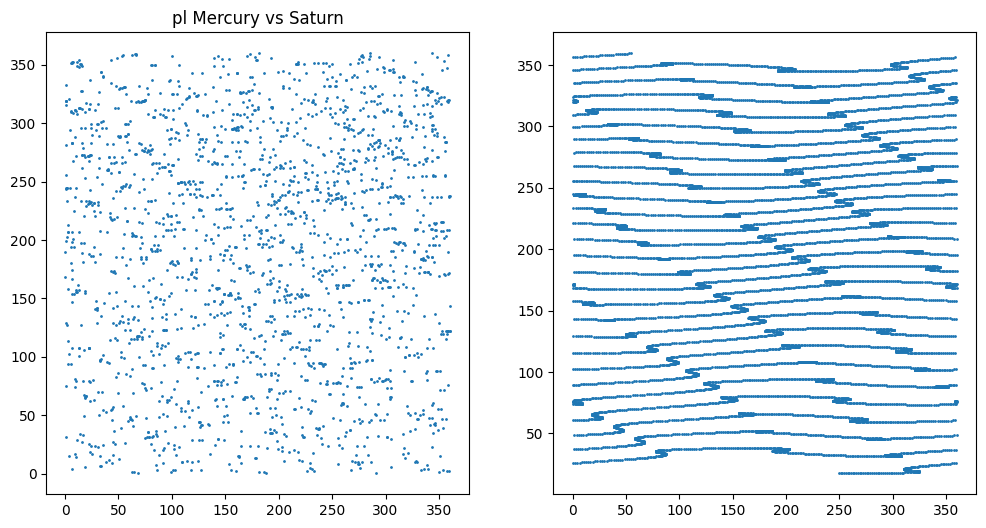

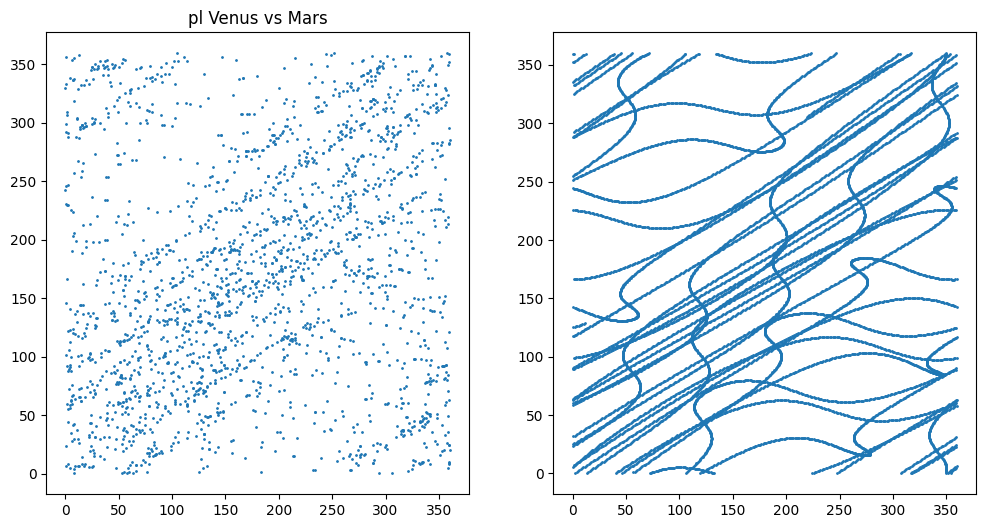

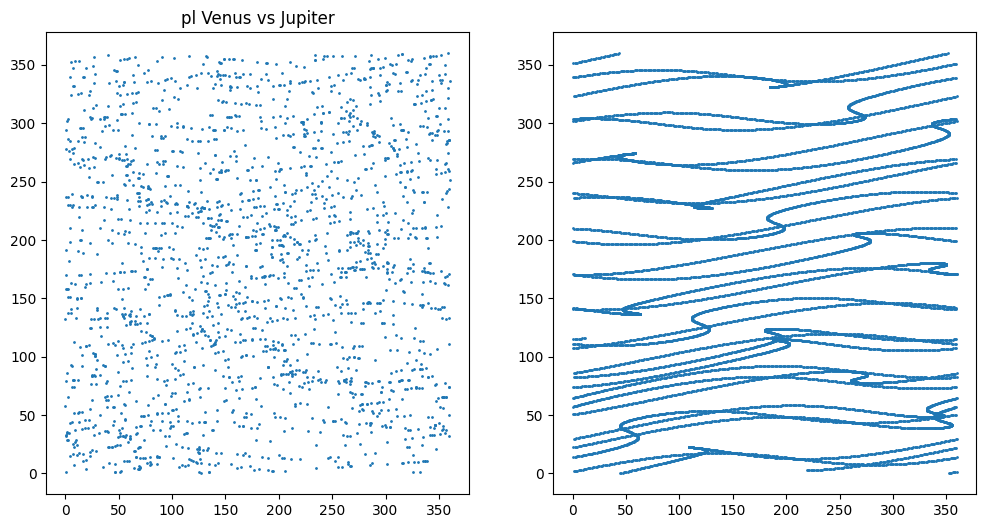

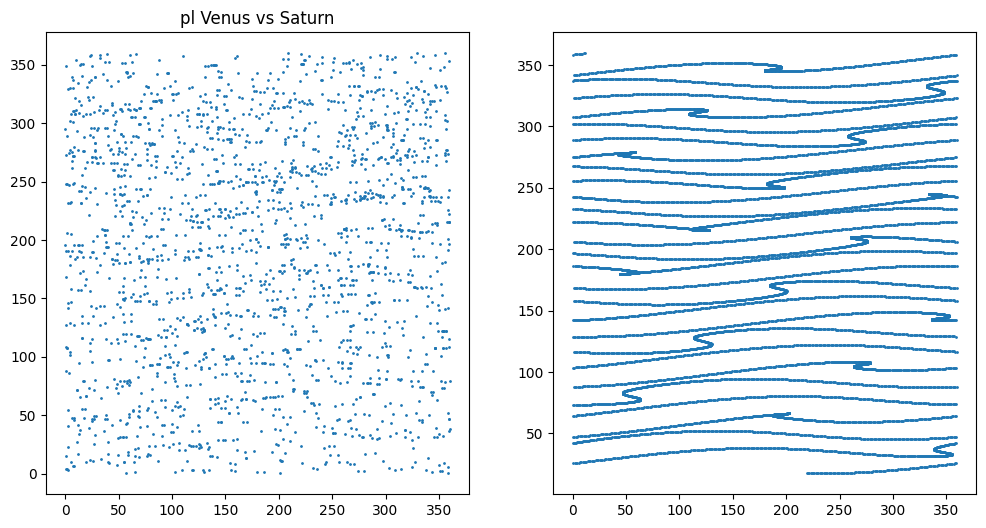

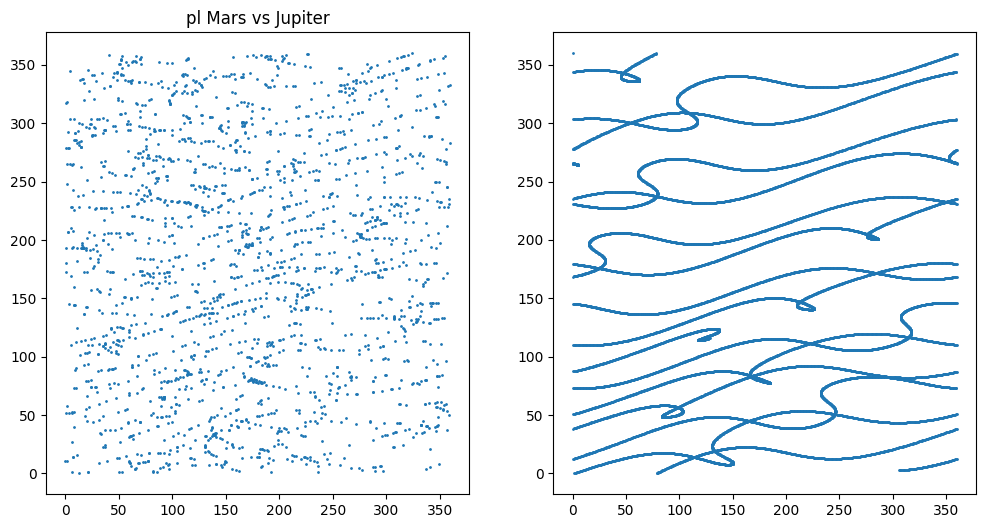

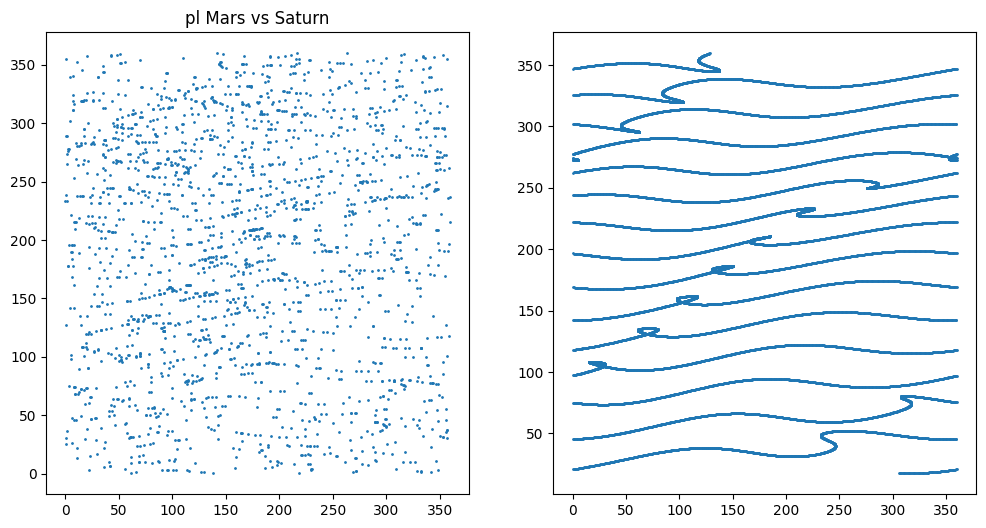

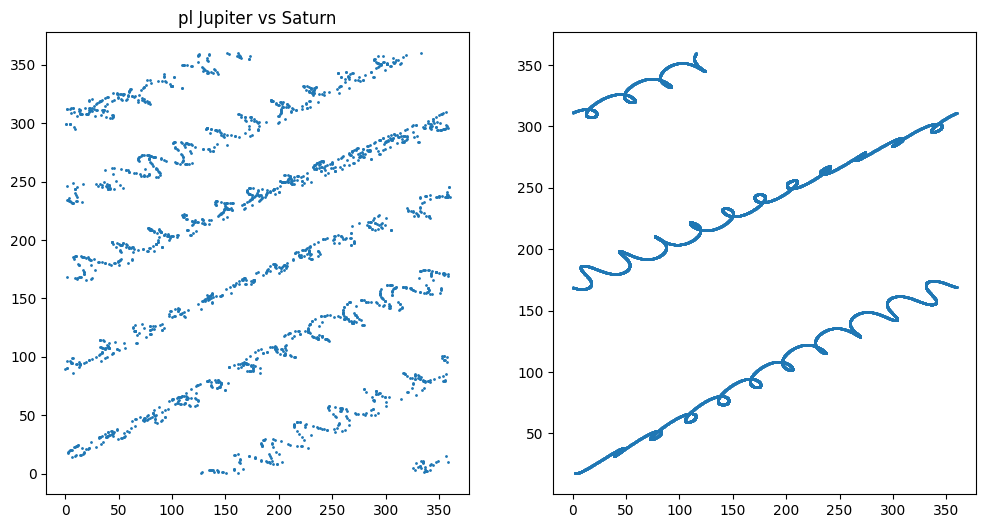

In [4]:
plnames= ['Sun','Moon', 'Mercury', 'Venus', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto', 'mean Node']
for i in range(7):
    for j in range(i+1, 7):
        plt.figure(figsize=(12,6))
        plt.subplot(1,2,1)
        plt.title("pl %s vs %s"%(plnames[i],plnames[j]))
        plt.scatter(df[plnames[i]], df[plnames[j]], s=1)
        plt.subplot(1,2,2)
        plt.scatter(odf[plnames[i]], odf[plnames[j]], s=1)
        plt.show()

Text(0.5, 1.0, 'earthquake pos, sun vs moon')

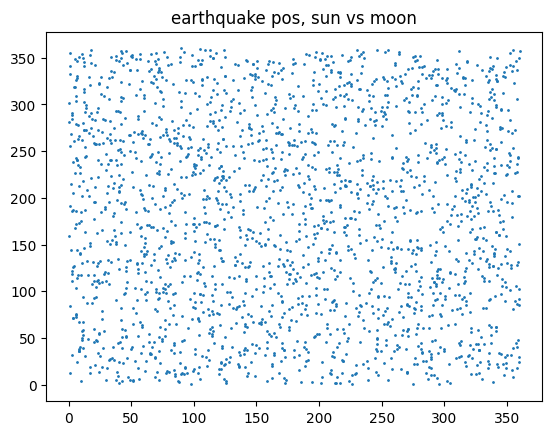

In [5]:
plt.scatter(df["Sun"], df["Moon"], s=1)
plt.title('earthquake pos, sun vs moon')

## check if there any skew with sun or planet position

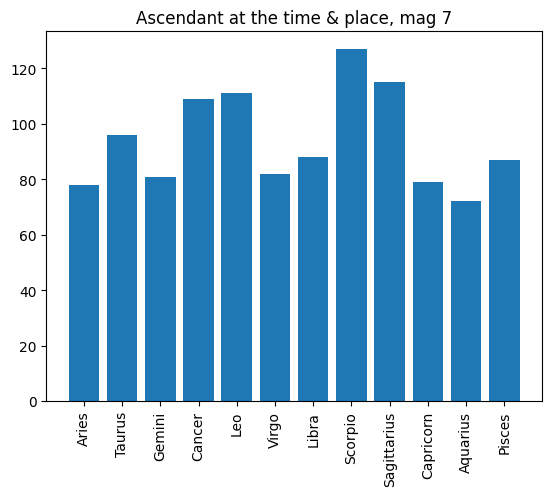

In [6]:
import numpy as np
zodiac_names = [
    "Aries", "Taurus", "Gemini", "Cancer", "Leo", "Virgo",
    "Libra", "Scorpio", "Sagittarius", "Capricorn", "Aquarius", "Pisces"
]
mag=7
sdf=df[(df.Mag>=mag)]
d = (sdf['Asc'] / (360/12)).astype(np.int32).value_counts().sort_index().to_dict()
x = range(12)
y  = [d.get(i, 0) for i in x]
plt.bar(x,y)
plt.xticks(ticks=x, labels=zodiac_names, rotation=90);
plt.title("Ascendant at the time & place, mag %s"%(mag,))
plt.show()

Observation: There considerable skew on cancer,leo & scorpio,Sagittarius.

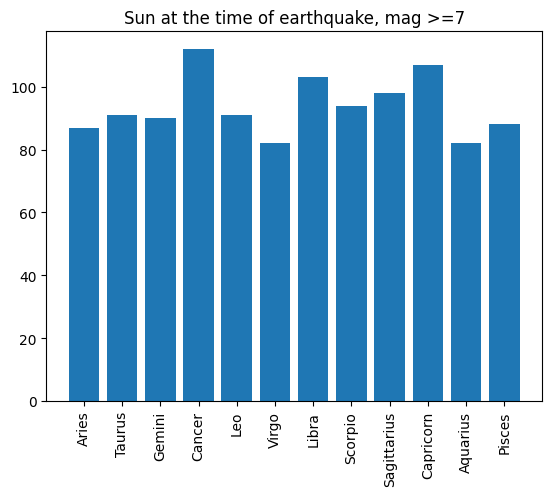

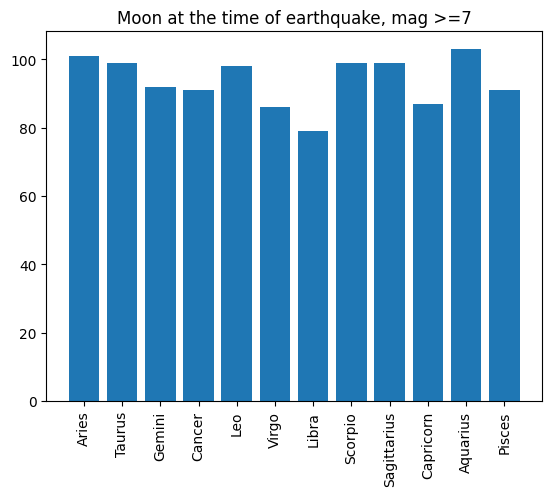

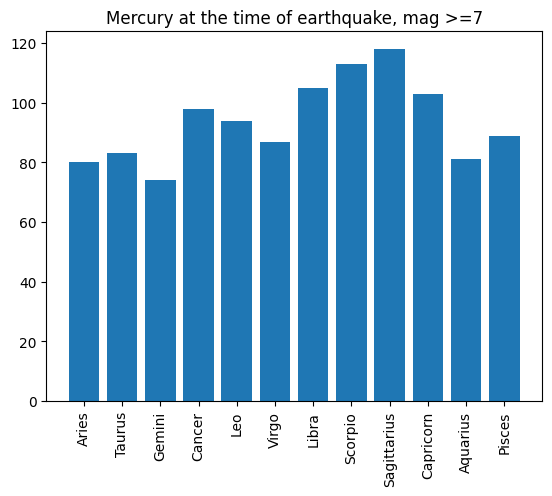

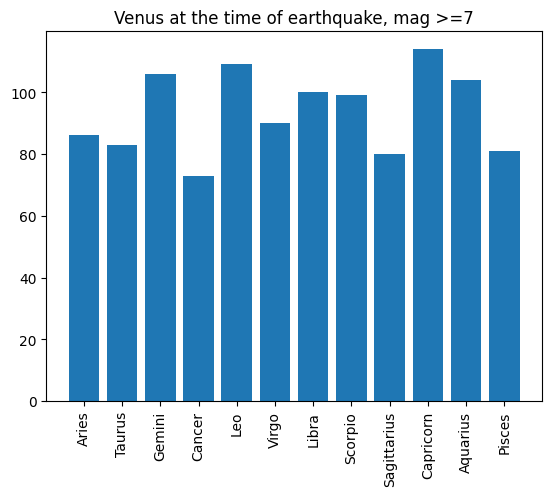

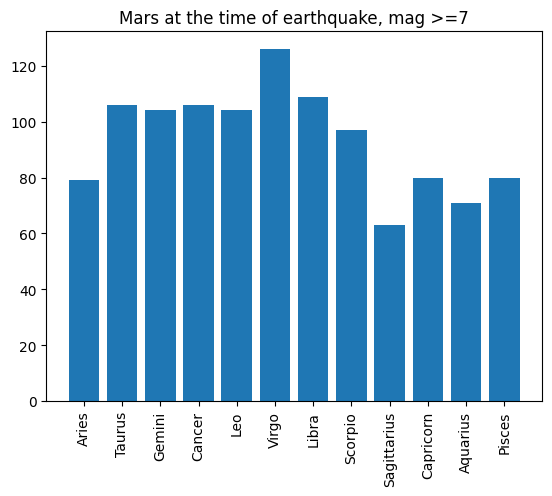

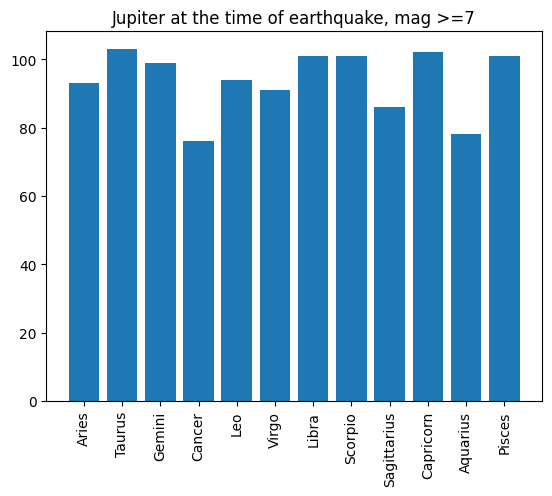

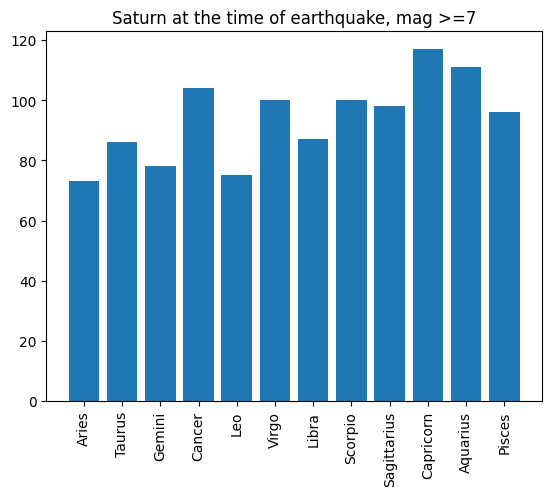

In [7]:
i=1
mag=7
for i in range(7):
    sdf=df[(df.Mag>=mag)]
    d = (sdf[plnames[i]] / (360/12)).astype(np.int32).value_counts().sort_index().to_dict()
    x = range(12)
    y  = [d.get(i, 0) for i in x]
    plt.bar(x,y)
    plt.xticks(ticks=x, labels=zodiac_names, rotation=90);
    plt.title("%s at the time of earthquake, mag >=%s"%(plnames[i], mag,))
    plt.show()

Tithi is important component of panchanga, it is based on angular distance between sun & moon. When moon is with sun its Amavasya then 1-14 days of phases of moon then Poornima (full moon) when moon is 180 degrees to sun. Lets see how these events look like from tithi point of view.

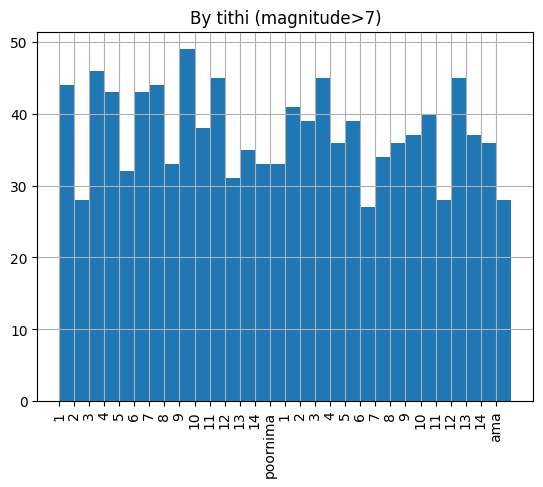

In [8]:
df['tithi'] = (df['Sun'] - df['Moon']).apply(lambda x : x if x>0 else x+360)
def draw_by_tithi(mag):
    sdf=df[df.Mag>=mag]
    sdf.tithi.hist(bins=30)
    plt.title("By tithi (magnitude>%s)"%mag)
    # Create x-ticks mapping
    bin_edges = np.linspace(0, 360, 31)  # 30 bins → 31 edges
    tithi_labels = [ '1',  '2',  '3',  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 
                    'poornima', 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 'ama']#np.arange(1, 31)  # Labels from 1 to 30
    plt.xticks(bin_edges[:-1], tithi_labels, rotation=90)  # Align bins with labels
    
    plt.savefig('img/by_tithi%s.png'%mag)
draw_by_tithi(7)

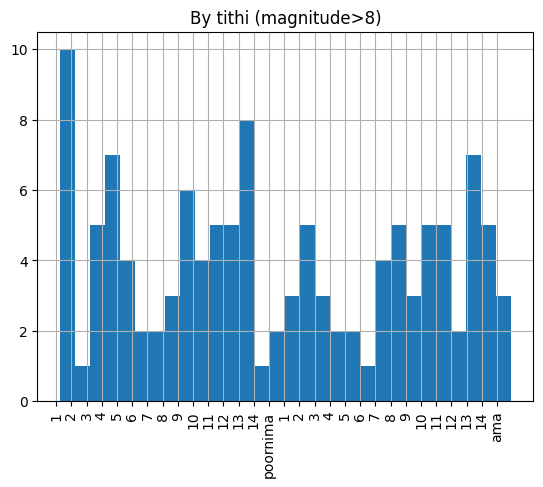

In [9]:
# lets consider only high magnitude one to see when intense earthquakes are occuring.
draw_by_tithi(8)

### enough of eyeball statestics lets run some tests

In [10]:
from scipy.stats import ks_2samp

# Perform Kolmogorov-Smirnov test
ks_stat, p_value = ks_2samp(df['Asc'], odf['Asc'])

# Output results
print(f"KS Statistic: {ks_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The distributions are significantly different (reject H0).")
else:
    print("No significant difference between the distributions (fail to reject H0).")

KS Statistic: 0.04775938349954669
P-value: 0.0005049206785261782
The distributions are significantly different (reject H0).


In [12]:
from scipy.stats import chi2_contingency

sample_events = df.sample(n=1000, random_state=40)
sample_daily = odf.sample(n=1000, random_state=40)

# Create a contingency table
contingency_table = pd.crosstab(
    (sample_events['Asc']/360*12).astype(np.int32),
    (sample_daily['Asc']/360*12).astype(np.int32)
)

# Perform the Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square p-value: {p_value}")

Chi-Square p-value: 0.04069037471352707


In [169]:
for i in range(1,5):
    sample_events = df.sample(n=2000)
    sample_daily = odf.sample(n=2000)
    ks_stat, p_value = ks_2samp(sample_daily['Asc'], sample_events['Asc'])

    print(i, p_value)
    if p_value < alpha:
        print("The distributions are significantly different (reject H0).")
    else:
        print("No significant difference between the distributions (fail to reject H0).")

1 0.005856338964770555
The distributions are significantly different (reject H0).
2 0.00014568888039759222
The distributions are significantly different (reject H0).
3 0.00652148041369766
The distributions are significantly different (reject H0).
4 0.002125924882003714
The distributions are significantly different (reject H0).
